In [1]:
import pandas as pd
import seaborn as sb
import seaborn as sns

In [2]:
left = pd.read_csv('events.csv')

C:\Users\Martín-\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
right = pd.read_csv('phone_release_year.csv')

In [4]:
datos = pd.merge(left, right, how='left', on='model')
datos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,Unnamed: 0,year,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,NaN,NaN,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,2013.0,9.0
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,2013.0,9.0
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,2017.0,4.0


In [5]:
datos_comprados_r = datos[datos["event"] == "conversion"].drop_duplicates("person")
datos_comprados = datos_comprados_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
datos_comprados.head()

,timestamp,event,person,sku,model,condition,storage,color,Unnamed: 0,year,month
220,2018-03-20 17:46:12,conversion,00204059,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,57.0,2014.0,9.0
2282,2018-04-26 22:28:53,conversion,00c13dee,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,80.0,2013.0,6.0
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,132.0,2015.0,4.0
4245,2018-03-16 13:50:25,conversion,0146a9df,2694,iPhone 5s,Bom,32GB,Cinza espacial,191.0,2013.0,9.0
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357,Samsung Galaxy J5,Bom,16GB,Preto,96.0,2015.0,6.0


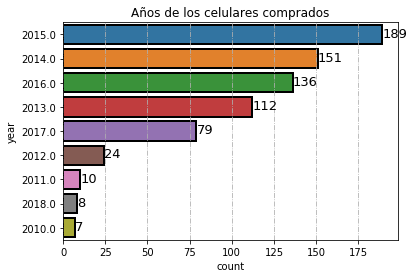

In [6]:
cell = sns.countplot(data=datos_comprados, y = 'year',edgecolor=(0,0,0), linewidth=2, order = datos_comprados['year'].value_counts().index )
cell.set_title('Años de los celulares comprados')
cell.grid(True, which='major', linestyle='-.', axis='x' )

for i in cell.patches:
    cell.text(i.get_width()+.1, i.get_y()+.50, \
            str(round((i.get_width()), 2)), fontsize=13, color='black')

Text(33,0.5,'Mes')

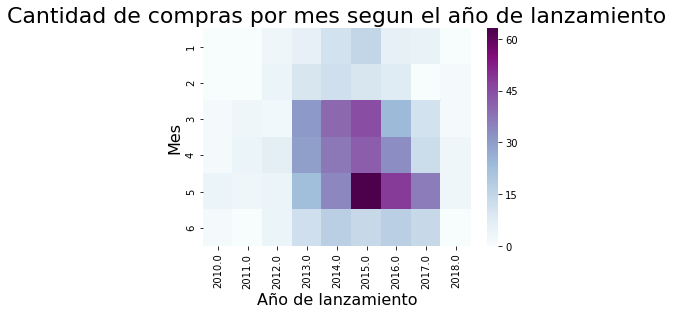

In [7]:
datos_comprados['timestamp'] = pd.to_datetime(datos_comprados['timestamp'])
datos_comprados['timestamp_month'] = datos_comprados['timestamp'].dt.month

cross = pd.crosstab(datos_comprados.timestamp_month, datos_comprados.year)
cross.head()

g = sb.heatmap(cross,  cmap="BuPu")
g.set_title("Cantidad de compras por mes segun el año de lanzamiento", fontsize=22)
g.set_xlabel("Año de lanzamiento",fontsize=16)
g.set_ylabel("Mes", fontsize=16)